In [13]:
import pandas as pd
stock_data = pd.read_csv('./GOOG-3.csv',index_col='Date')
stock_data.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-11,51.775002,52.189999,51.602501,52.055000,52.055000,23856000
2017-12-12,51.981499,52.515499,51.684502,52.023998,52.023998,25590000
2017-12-13,52.306000,52.333248,51.918999,52.030499,52.030499,25654000
2017-12-14,52.250000,52.924999,52.155499,52.457500,52.457500,31174000
2017-12-15,52.730499,53.381001,52.474998,53.209499,53.209499,65518000
2017-12-18,53.304001,53.924500,53.099998,53.856998,53.856998,31092000
2017-12-19,53.759998,53.841999,53.177502,53.534000,53.534000,26774000
2017-12-20,53.589001,53.668999,53.076000,53.247501,53.247501,25372000
2017-12-21,53.247501,53.466499,53.089699,53.181499,53.181499,19914000


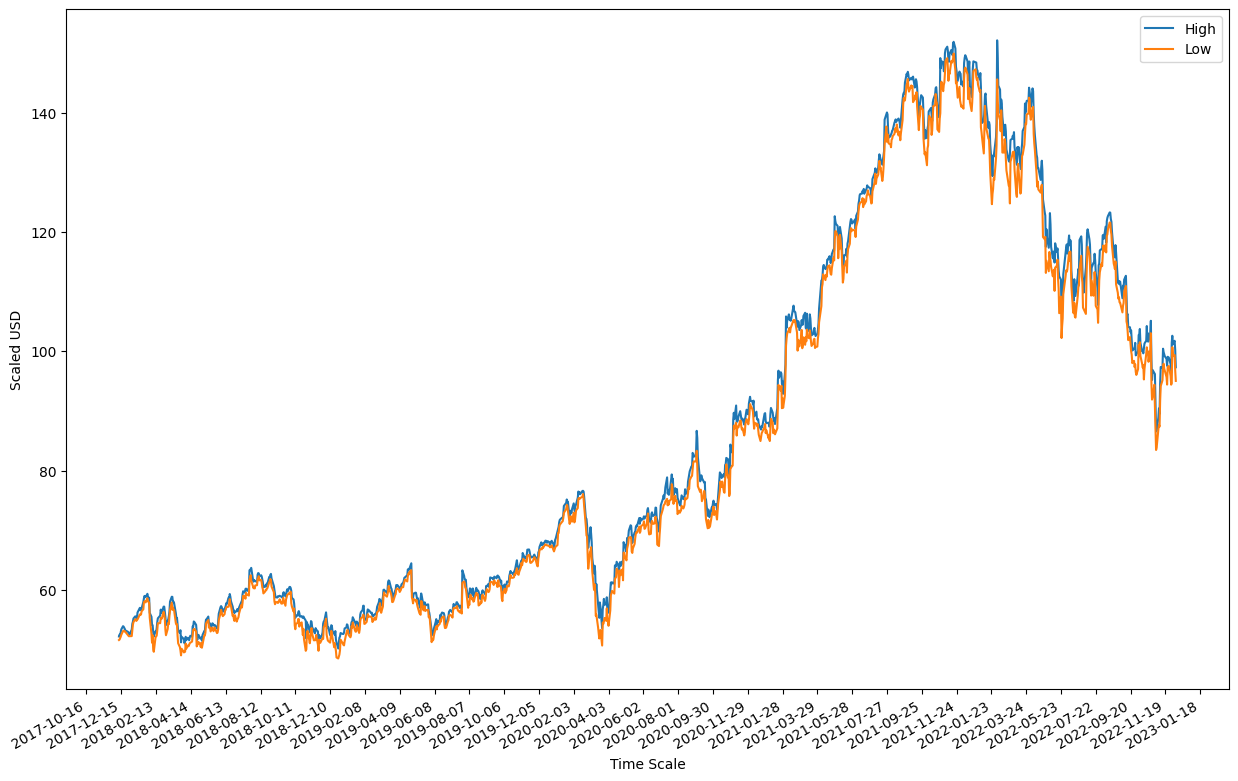

In [14]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label = 'High')
plt.plot(x_dates, stock_data['Low'], label = 'Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

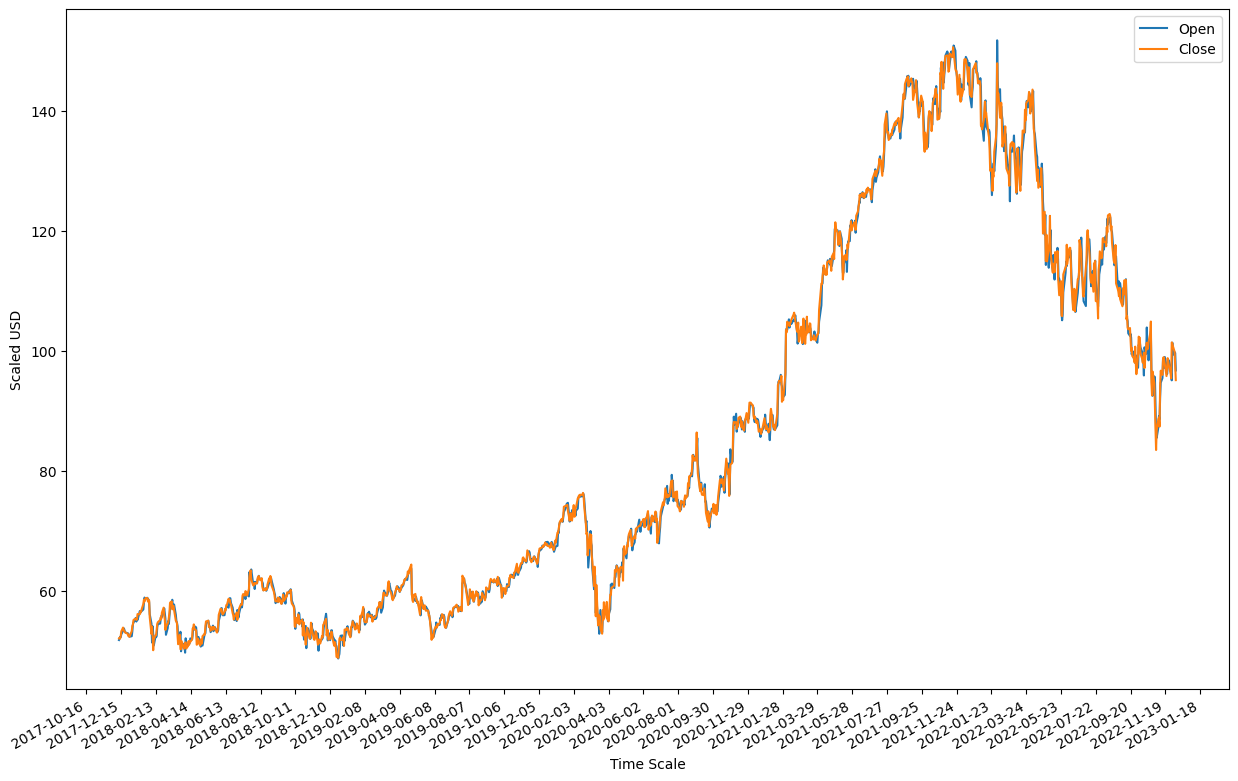

In [15]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]


plt.plot(x_dates, stock_data['Open'], label = 'Open')
plt.plot(x_dates, stock_data['Close'], label = 'Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [16]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [17]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [18]:
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                    data = X_ft,
                    index=X_feat.index)

In [19]:
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps-1, -1])
    
    return np.array(X), np.array(y)

In [23]:
X1, y1 = lstm_split(stock_data.values, n_steps=2)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(1256, 2, 5) (1005, 2, 5) (251, 2, 5) (251,)


In [24]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation = 'relu', return_sequences = True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer = 'adam')
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4864      
                                                                 
 dense (Dense)               (None, 2, 1)              33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
252/252 - 4s - loss: 1200609386561536.0000 - 4s/epoch - 16ms/step
Epoch 2/100
252/252 - 1s - loss: 1199290160513024.0000 - 715ms/epoch - 3ms/step
Epoch 3/100
252/252 - 1s - loss: 1194335915737088.0000 - 673ms/epoch - 3ms/step
Epoch 4/100
252/252 - 1s - loss: 1183811769466880.0000 - 640ms/epoch - 3ms/step
Epoch 5/100
252/252 - 1s - loss: 1166674044649472.0000 - 828ms/epoch - 3ms/step
Epoch 6/100
252/252 - 1s - loss: 1142764364365824.0000 - 725ms/epoch - 3ms/step
Epoch 7/100
252/252 - 1s - loss: 1112523835179008.0000 - 853ms/epoch - 3ms/step
Epoch 8/100
252/252 - 1s - loss: 1077030695206912.0000 - 609ms/epoch - 2ms/step
Epoch 9/100
252/252 - 1s - loss: 1037910925115392.0000 - 728ms/epoch - 3ms/step
Epoch 10/100
252/252 - 1s - loss: 997202218450944.0000 - 625ms/epoch - 2ms/step
Epoch 11/100
252/252 - 1s - loss: 957157084233728.0000 - 732ms/epoch - 3ms/step
Epoch 12/100
252/252 - 1s - loss: 919973471977472.0000 - 633ms/epoch - 3ms/step
Epoch 13/100
252/252 - 1s - loss: 88747358

In [28]:
y_pred = lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [31]:
rmse = mean_squared_error(y_test, y_pred, squared=True)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ", rmse)
print("MAPE: ",mape)

ValueError: Found array with dim 3. None expected <= 2.